## DRILL: Prepare the Data
Download the Excel file here on crime data in New York State in 2013, provided by the FBI: UCR (Thinkful mirror).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

### 𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦
 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df_offense = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df_offense

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN


In [3]:
df_offense.shape

(355, 13)

In [4]:
df_offense.index

RangeIndex(start=0, stop=355, step=1)

In [5]:
df_offense.columns

Index(['Table 8', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [6]:
df_offense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 13 columns):
Table 8        355 non-null object
Unnamed: 1     349 non-null object
Unnamed: 2     349 non-null object
Unnamed: 3     349 non-null object
Unnamed: 4     1 non-null object
Unnamed: 5     350 non-null object
Unnamed: 6     349 non-null object
Unnamed: 7     349 non-null object
Unnamed: 8     349 non-null object
Unnamed: 9     349 non-null object
Unnamed: 10    349 non-null object
Unnamed: 11    349 non-null object
Unnamed: 12    188 non-null object
dtypes: object(13)
memory usage: 36.1+ KB


In [7]:
#Num of non_NA values
df_offense.count()

Table 8        355
Unnamed: 1     349
Unnamed: 2     349
Unnamed: 3     349
Unnamed: 4       1
Unnamed: 5     350
Unnamed: 6     349
Unnamed: 7     349
Unnamed: 8     349
Unnamed: 9     349
Unnamed: 10    349
Unnamed: 11    349
Unnamed: 12    188
dtype: int64

In [8]:
df_offense.isna().sum()

Table 8          0
Unnamed: 1       6
Unnamed: 2       6
Unnamed: 3       6
Unnamed: 4     354
Unnamed: 5       5
Unnamed: 6       6
Unnamed: 7       6
Unnamed: 8       6
Unnamed: 9       6
Unnamed: 10      6
Unnamed: 11      6
Unnamed: 12    167
dtype: int64

In [9]:
df_offense.isna().count()

Table 8        355
Unnamed: 1     355
Unnamed: 2     355
Unnamed: 3     355
Unnamed: 4     355
Unnamed: 5     355
Unnamed: 6     355
Unnamed: 7     355
Unnamed: 8     355
Unnamed: 9     355
Unnamed: 10    355
Unnamed: 11    355
Unnamed: 12    355
dtype: int64

In [10]:
df_offense.isna().sum()/df_offense.isna().count()

Table 8       0.000
Unnamed: 1    0.017
Unnamed: 2    0.017
Unnamed: 3    0.017
Unnamed: 4    0.997
Unnamed: 5    0.014
Unnamed: 6    0.017
Unnamed: 7    0.017
Unnamed: 8    0.017
Unnamed: 9    0.017
Unnamed: 10   0.017
Unnamed: 11   0.017
Unnamed: 12   0.470
dtype: float64

In [11]:
df_offense.nunique()

Table 8        355
Unnamed: 1     348
Unnamed: 2      83
Unnamed: 3      15
Unnamed: 4       1
Unnamed: 5      28
Unnamed: 6      52
Unnamed: 7      70
Unnamed: 8     240
Unnamed: 9     125
Unnamed: 10    233
Unnamed: 11     52
Unnamed: 12     14
dtype: int64

In [12]:
df_offense.iloc[3]

Table 8                                          City
Unnamed: 1                                 Population
Unnamed: 2                             Violent\ncrime
Unnamed: 3     Murder and\nnonnegligent\nmanslaughter
Unnamed: 4               Rape\n(revised\ndefinition)1
Unnamed: 5                Rape\n(legacy\ndefinition)2
Unnamed: 6                                    Robbery
Unnamed: 7                        Aggravated\nassault
Unnamed: 8                            Property\ncrime
Unnamed: 9                                   Burglary
Unnamed: 10                           Larceny-\ntheft
Unnamed: 11                     Motor\nvehicle\ntheft
Unnamed: 12                                    Arson3
Name: 3, dtype: object

In [13]:
list(df_offense.iloc[3])

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3']

In [14]:
df_offense.columns= ['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3']

In [15]:
df_offense.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [16]:
df_offense.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
350,Yonkers,199134,1036,6,NaN,25,390,615,2368,470,1662,236,10
351,Yorktown Town,36643,15,0,NaN,0,2,13,334,45,287,2,NaN
352,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Fix the name of the column for easy string command
df_offense.columns = df_offense.columns.str.strip().str.replace(' ', '_').str.replace('/','_').str.lower()

In [18]:
df_offense.head()

,city,population,violent crime,murder_and nonnegligent manslaughter,rape (revised definition)1,rape (legacy definition)2,robbery,aggravated assault,property crime,burglary,larceny- theft,motor vehicle theft,arson3
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [19]:
df_offense.columns

Index(['city', 'population', 'violent\ncrime',
       'murder_and\nnonnegligent\nmanslaughter',
       'rape\n(revised\ndefinition)1', 'rape\n(legacy\ndefinition)2',
       'robbery', 'aggravated\nassault', 'property\ncrime', 'burglary',
       'larceny-\ntheft', 'motor\nvehicle\ntheft', 'arson3'],
      dtype='object')

In [20]:
df_offense.columns = ['city', 'pop', 'violent_crime',
       'murder',
       'rape_1', 'rape_2',
       'robbery', 'agg_assault', 'property_crime', 'burglary',
       'larceny_theft', 'mot_veh_theft', 'arson']

In [21]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
#df_offense_cln = df_offense.iloc[:, 'pop':].dropna(how='all')

In [22]:
df_offense.head()

,city,pop,violent_crime,murder,rape_1,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,arson
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [23]:
df_offense.tail()

,city,pop,violent_crime,murder,rape_1,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,arson
350,Yonkers,199134,1036,6,NaN,25,390,615,2368,470,1662,236,10
351,Yorktown Town,36643,15,0,NaN,0,2,13,334,45,287,2,NaN
352,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_offense.shape

(355, 13)

In [25]:
#df_offense = df_offense[:-3]

In [26]:
#delete column rape_1 and arson is mostly empty
df_offense = df_offense.drop(['rape_1'], axis=1)
df_offense = df_offense.drop(['arson'], axis=1)

In [27]:
df_offense.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft
4,Adams Village,1861,0,0,0,0,0,12,2,10,0


In [28]:
df_offense = df_offense.drop(0)
df_offense = df_offense.drop(1)
df_offense = df_offense.drop(2)
df_offense = df_offense.drop(3)


In [29]:
df_offense.shape

(351, 11)

In [30]:
#convert some object to integers or float
for i in range(0, len(df_offense.columns)):
    df_offense.iloc[:, i] = pd.to_numeric(df_offense.iloc[:, i], errors= 'ignore')


In [31]:
df_offense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 4 to 354
Data columns (total 11 columns):
city              351 non-null object
pop               348 non-null float64
violent_crime     348 non-null float64
murder            348 non-null float64
rape_2            348 non-null float64
robbery           348 non-null float64
agg_assault       348 non-null float64
property_crime    348 non-null float64
burglary          348 non-null float64
larceny_theft     348 non-null float64
mot_veh_theft     348 non-null float64
dtypes: float64(10), object(1)
memory usage: 32.9+ KB


In [32]:
df_offense.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
5,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
6,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
7,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000
8,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000


In [33]:
df_offense.isna().sum()

city              0
pop               3
violent_crime     3
murder            3
rape_2            3
robbery           3
agg_assault       3
property_crime    3
burglary          3
larceny_theft     3
mot_veh_theft     3
dtype: int64

In [34]:
df_offense.fillna((df_offense.interpolate()), inplace=True)

In [35]:
df_offense.isna().sum()

city              0
pop               0
violent_crime     0
murder            0
rape_2            0
robbery           0
agg_assault       0
property_crime    0
burglary          0
larceny_theft     0
mot_veh_theft     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3F00439B0>,
      dtype=object)

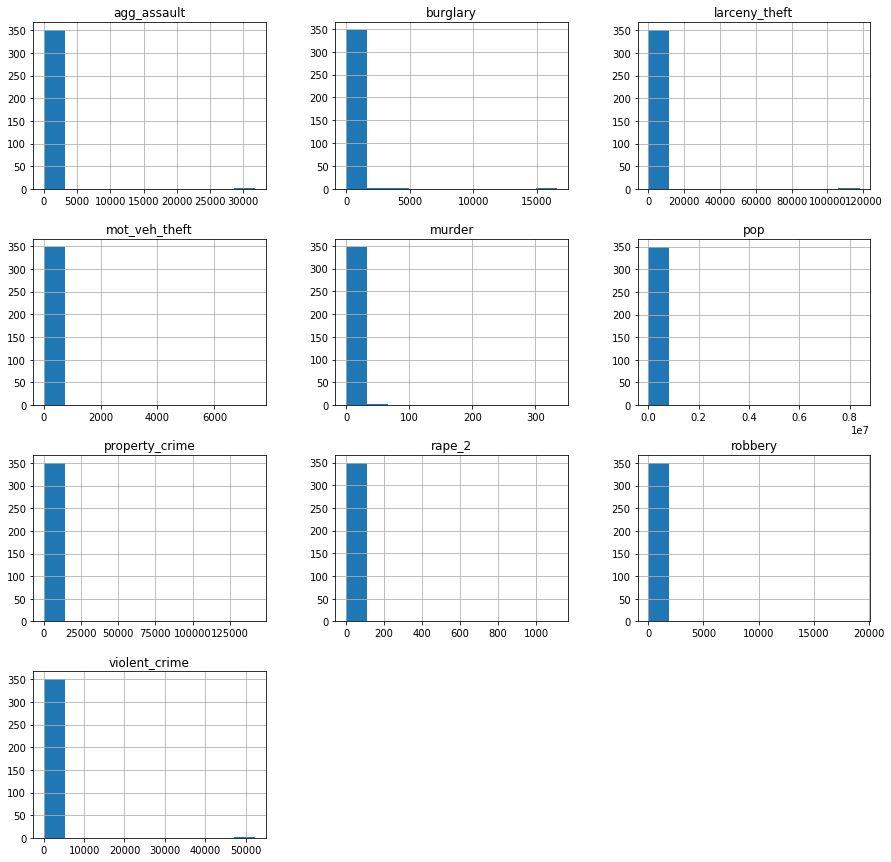

In [36]:
#Check the data
df_offense.hist(figsize=(15,15))

[Text(0, 0, 'pop'),
 Text(0, 0, 'violent_crime'),
 Text(0, 0, 'murder'),
 Text(0, 0, 'rape_2'),
 Text(0, 0, 'robbery'),
 Text(0, 0, 'agg_assault'),
 Text(0, 0, 'property_crime'),
 Text(0, 0, 'burglary'),
 Text(0, 0, 'larceny_theft'),
 Text(0, 0, 'mot_veh_theft')]

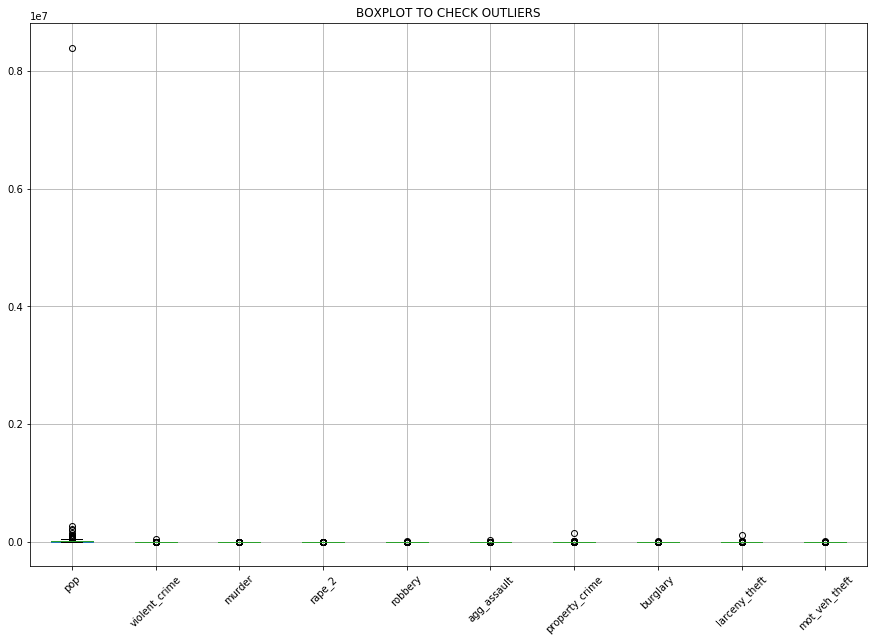

In [37]:
#check for outliers
plt.figure(figsize=(15,10))
ax = df_offense.boxplot()
ax.set_title('BOXPLOT TO CHECK OUTLIERS')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [38]:
df_offense.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
5,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
6,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
7,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000
8,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000


In [39]:
df_offense['pop_sqr'] = df_offense['pop']**2

In [40]:
df_offense.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,pop_sqr
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,3463321.000
5,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,6640929.000
6,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,8099716.000
7,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,9595377936.000
8,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,40806544.000


In [41]:
df_offense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 4 to 354
Data columns (total 12 columns):
city              351 non-null object
pop               351 non-null float64
violent_crime     351 non-null float64
murder            351 non-null float64
rape_2            351 non-null float64
robbery           351 non-null float64
agg_assault       351 non-null float64
property_crime    351 non-null float64
burglary          351 non-null float64
larceny_theft     351 non-null float64
mot_veh_theft     351 non-null float64
pop_sqr           351 non-null float64
dtypes: float64(11), object(1)
memory usage: 35.6+ KB


In [42]:
df_offense.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,pop_sqr
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,3463321.000
5,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,6640929.000
6,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,8099716.000
7,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,9595377936.000
8,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,40806544.000


In [43]:
def funct(x):
    if x ==0:
        return int('0')
    elif x > 0:
        return int('1')



In [44]:
df_offense['robbery_cat'] = df_offense['robbery'].apply(funct)

In [45]:
df_offense['murder_cat'] = df_offense['murder'].apply(funct)

In [46]:
df_offense.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,pop_sqr,robbery_cat,murder_cat
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,3463321.000,0,0
5,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,6640929.000,0,0
6,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,8099716.000,0,0
7,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,9595377936.000,1,1
8,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,40806544.000,1,0
